In [26]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.26.0 to work with precigout


In [27]:
!pip install seaborn

In [28]:
import os, shutil

# Create a folder for the experiment files
folder_name = 'housePrice-experiment-files'
experiment_folder = './' + folder_name
os.makedirs(folder_name, exist_ok=True)

# Copy the data file into the experiment folder
shutil.copy('data/train.csv', os.path.join(folder_name, "House_pricing.csv"))

'housePrice-experiment-files/House_pricing.csv'

Starting experiment: mslearn-housePrice
Analyzing 1460 rows of data


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

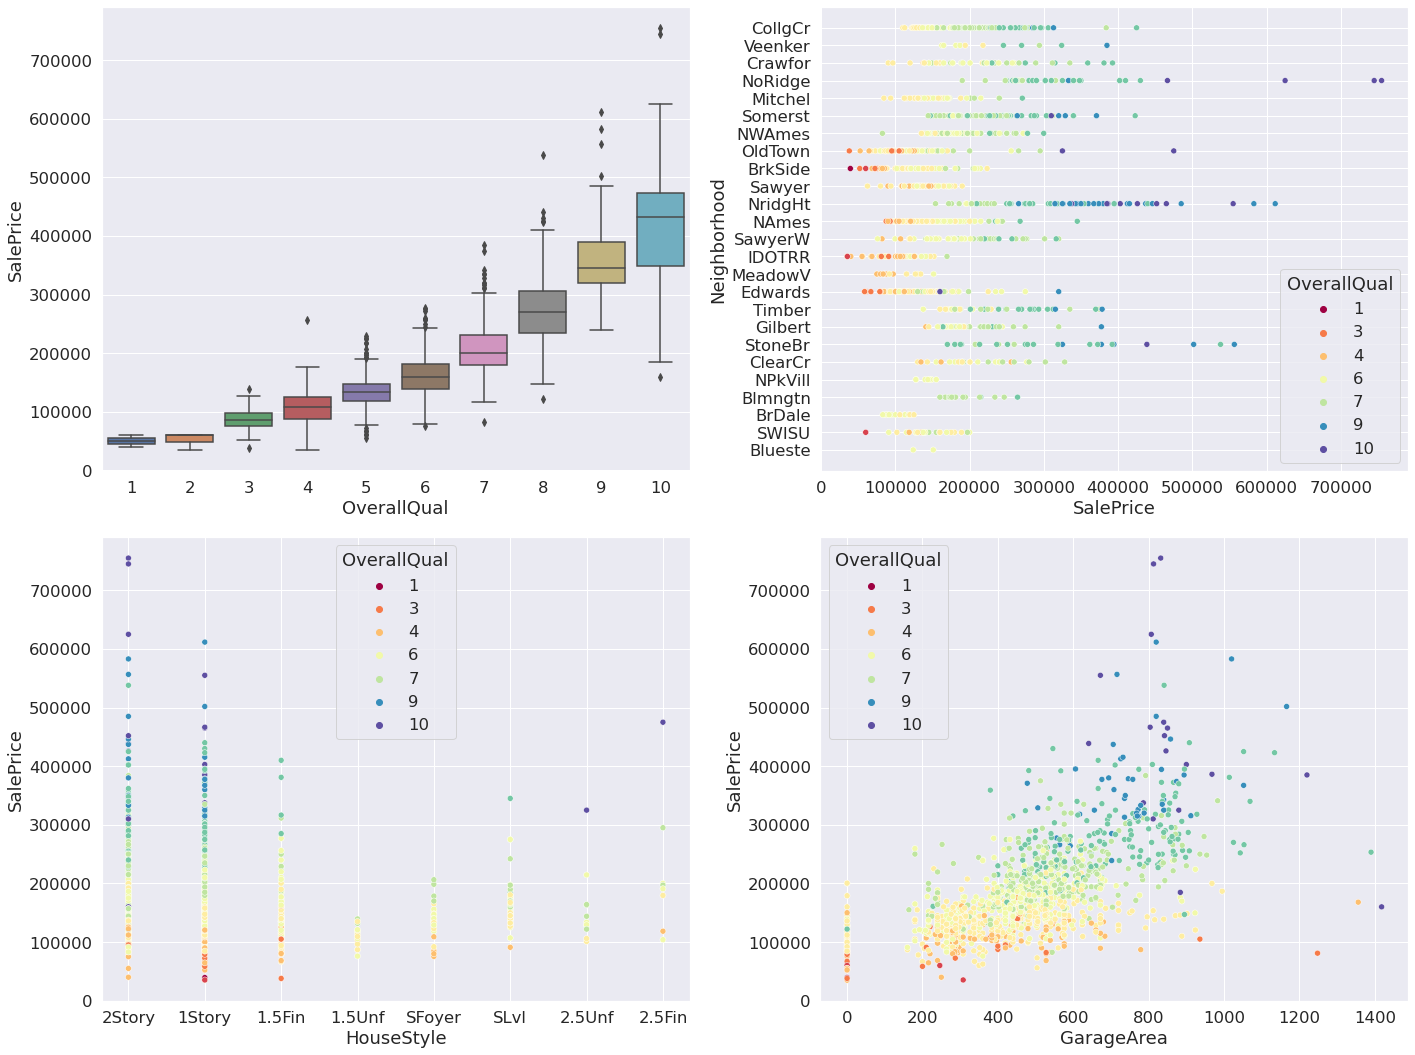

array(['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
   

In [33]:
#%%writefile $folder_name/diabetes_experiment.py
from azureml.core import Experiment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace=ws, name="mslearn-housePrice")

# Start logging data from the experiment, obtaining a reference to the experiment run
run = experiment.start_logging()
print("Starting experiment:", experiment.name)

# load the data from a local file
data = pd.read_csv('data/train.csv')

# Count the rows and log the result
row_count = (len(data))
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))

# finding the correlation between features
corr = data.corr()['SalePrice']
display(corr)

# exploring the data
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=data[['SalePrice', 'OverallQual']])

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = data.SalePrice, y = data.Neighborhood, hue=data.OverallQual, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = data.HouseStyle, y = data.SalePrice, hue=data.OverallQual, palette= 'Spectral')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = data.GarageArea, y = data.SalePrice, hue=data.OverallQual, palette= 'Spectral')


plt.tight_layout(); plt.show()

housePrice = data.copy()
housePrice = housePrice.replace('NA',np.nan)
housePrice = housePrice.drop(columns=["MiscFeature","Fence","PoolQC","FireplaceQu","Alley","LotFrontage"])
housePrice = housePrice.dropna(axis=0)

dataprep = pd.get_dummies(housePrice, columns=['MSSubClass','Neighborhood',"MSZoning","Street","LotShape","LandContour",'Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive' ,'SaleType','SaleCondition'])

display(dataprep.columns.values)

# Complete the run
run.complete()

In [31]:
# Get logged metrics
metrics = run.get_metrics()
for key in metrics.keys():
        print(key, metrics.get(key))
print('\n')
for file in run.get_file_names():
    print(file)

observations [1460, 1460]




In [32]:
run.get_details_with_logs()

{'runId': '753b21d2-05b3-44cc-9c3a-e94caf628254',
 'target': 'local',
 'status': 'Completed',
 'startTimeUtc': '2021-04-25T21:06:19.873106Z',
 'endTimeUtc': '2021-04-25T21:06:37.606393Z',
 'properties': {'azureml.git.repository_uri': 'https://github.com/MicrosoftLearning/mslearn-dp100',
  'mlflow.source.git.repoURL': 'https://github.com/MicrosoftLearning/mslearn-dp100',
  'azureml.git.branch': 'main',
  'mlflow.source.git.branch': 'main',
  'azureml.git.commit': 'd78f254b82e2df95e0f9fa47bf60f9268b604693',
  'mlflow.source.git.commit': 'd78f254b82e2df95e0f9fa47bf60f9268b604693',
  'azureml.git.dirty': 'True',
  'ContentSnapshotId': '3a7710cb-9a6f-4434-86c6-dded57a02746'},
 'inputDatasets': [],
 'outputDatasets': [],
 'logFiles': {},
 'submittedBy': 'Gabriel Alexandre Florian Samuel PRECIGOUT'}